In [2]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as mplt # type: ignore
import seaborn as sb # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.neighbors import KNeighborsRegressor # type: ignore
from sklearn.metrics import mean_squared_error # type: ignore
from sklearn.model_selection import GridSearchCV # type: ignore
from sklearn.metrics import r2_score

In [3]:
data = pd.read_excel("../Data/Insurance-data.xlsx")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
995,39,female,23.275,3,no,northeast,7986.47525
996,39,female,34.100,3,no,southwest,7418.52200
997,63,female,36.850,0,no,southeast,13887.96850
998,33,female,36.290,3,no,northeast,6551.75010


# A. Description pour représenter les caractéristiques du dataset

In [8]:
print(data.head())

print(data.describe())

print(data.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1000.000000  1000.000000  1000.000000   1000.000000
mean     39.640000    30.865565     1.080000  13099.629425
std      14.169586     6.046396     1.198765  11994.129978
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.600000     0.000000   4719.683425
50%      40.000000    30.590000     1.000000   9286.850750
75%      52.000000    35.112500     2.000000  16073.095438
max      64.000000    50.380000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns

# B. Analyse descriptive des Données

## Analyse descriptive univariée des variables quantitatives

In [9]:
# Filtrer les colonnes quantitatives
QuantitativeData = data.select_dtypes(include=[np.number]).columns
QuantitativeData

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [10]:
#Stat descriptive des variables quantitative
print(data[QuantitativeData].info())
print( data[QuantitativeData].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   bmi       1000 non-null   float64
 2   children  1000 non-null   int64  
 3   charges   1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB
None
               age          bmi     children       charges
count  1000.000000  1000.000000  1000.000000   1000.000000
mean     39.640000    30.865565     1.080000  13099.629425
std      14.169586     6.046396     1.198765  11994.129978
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.600000     0.000000   4719.683425
50%      40.000000    30.590000     1.000000   9286.850750
75%      52.000000    35.112500     2.000000  16073.095438
max      64.000000    50.380000     5.000000  63770.428010


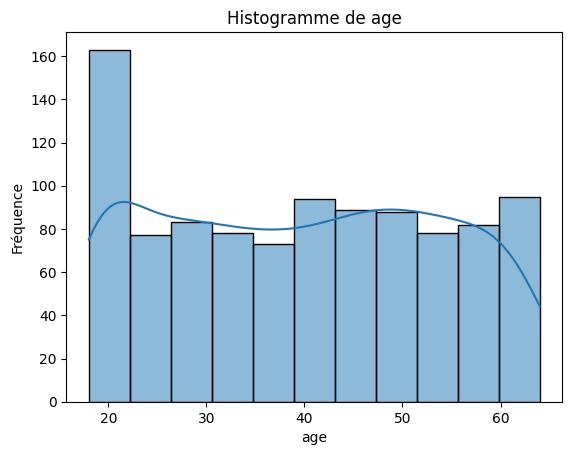

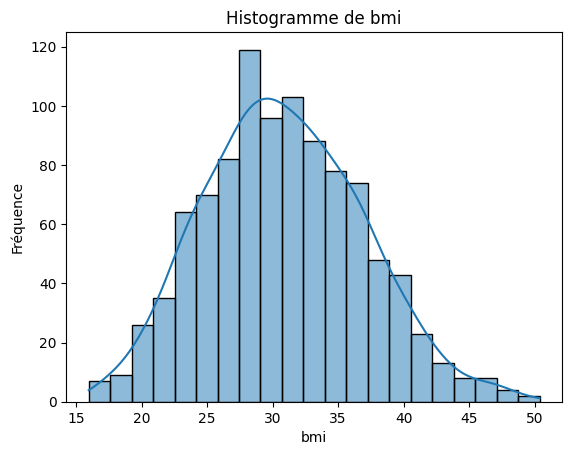

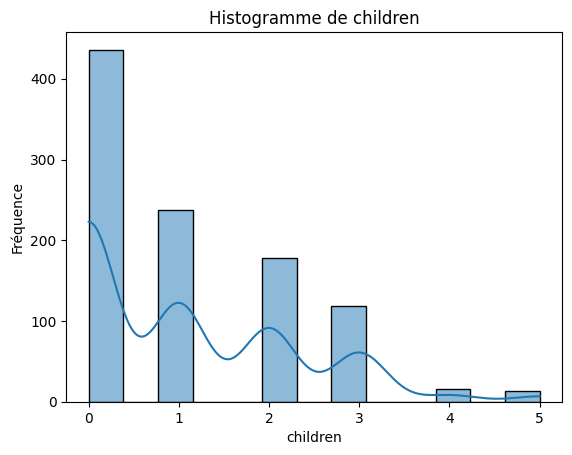

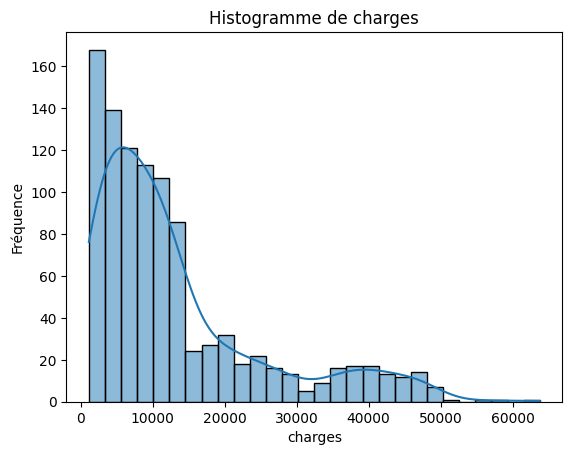

In [11]:
#Histogramme

for colonne in QuantitativeData:
    mplt.figure()
    sb.histplot(data[colonne], kde=True)
    mplt.title(f"Histogramme de {colonne}")
    mplt.xlabel(colonne)
    mplt.ylabel("Fréquence")
    mplt.show()

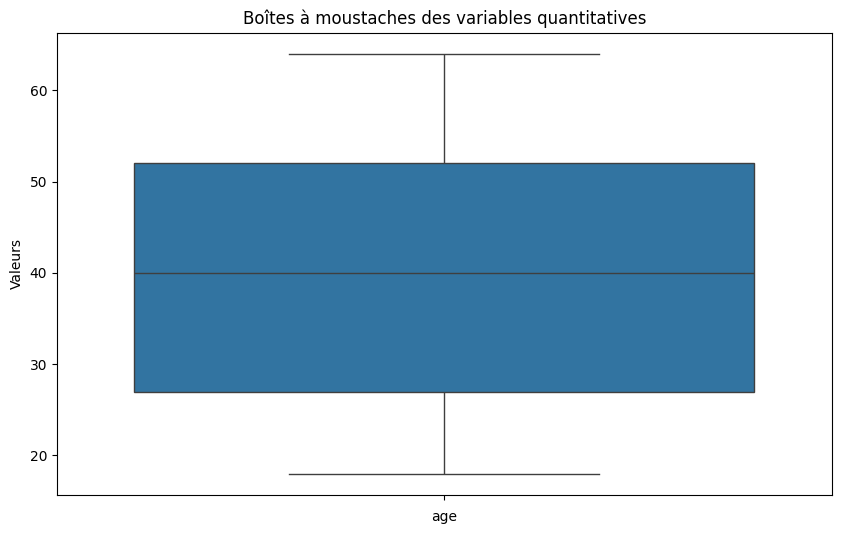

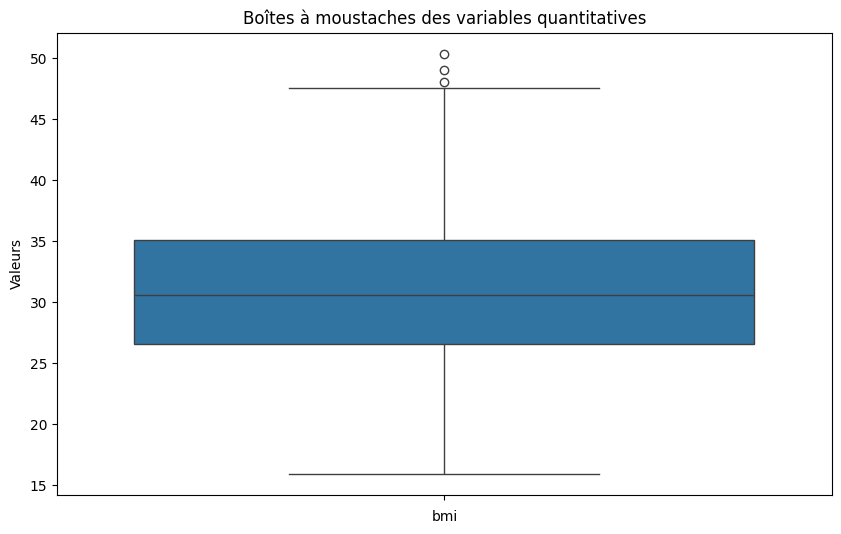

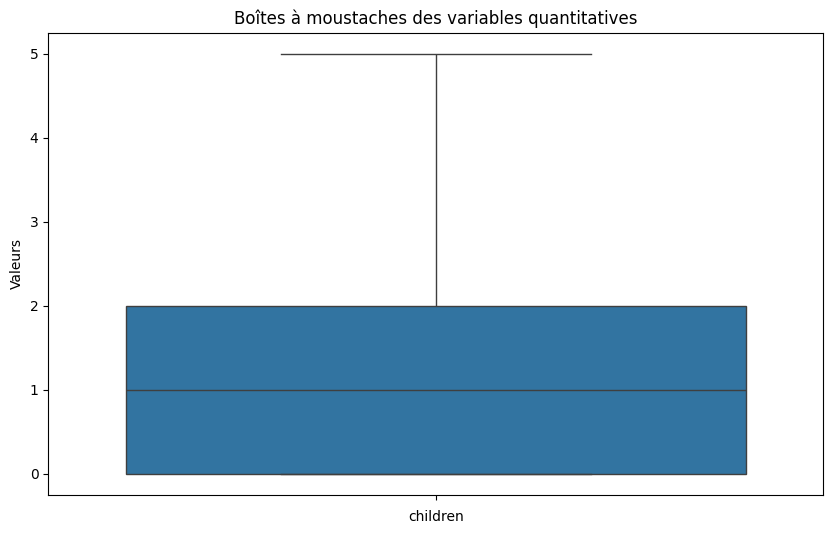

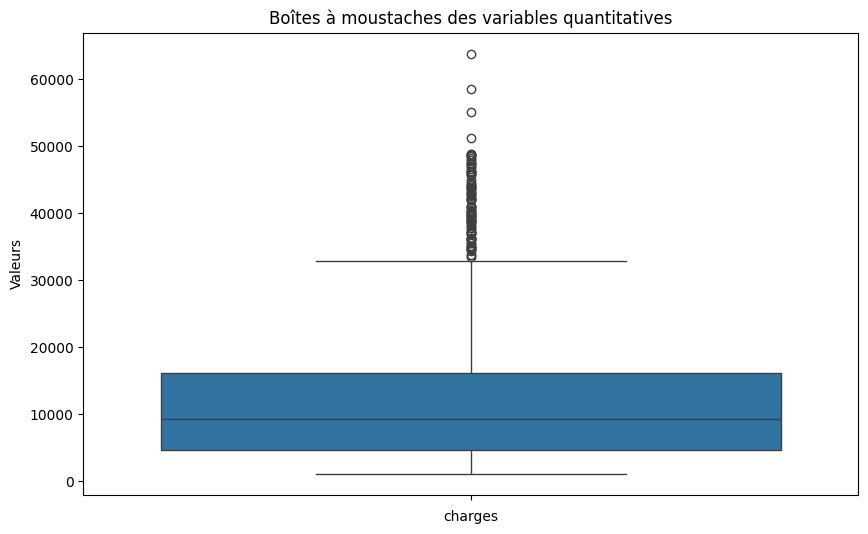

In [12]:
# Créer des boîtes à moustaches pour chaque variable quantitative
for colonne in QuantitativeData:
    mplt.figure(figsize=(10, 6))
    sb.boxplot(data[colonne])
    mplt.title("Boîtes à moustaches des variables quantitatives")
    mplt.xlabel(colonne)
    mplt.ylabel("Valeurs")
    mplt.show()

# Analyse descriptive univariée des variables qualitative

In [13]:
QualitativeData = ["sex" , "smoker" , "region"]

In [14]:
#Statistique Descriptive

print(data[QualitativeData].describe())
print(data[QualitativeData].info())

         sex smoker     region
count   1000   1000       1000
unique     2      2          4
top     male     no  southeast
freq     505    803        278
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1000 non-null   object
 1   smoker  1000 non-null   object
 2   region  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB
None


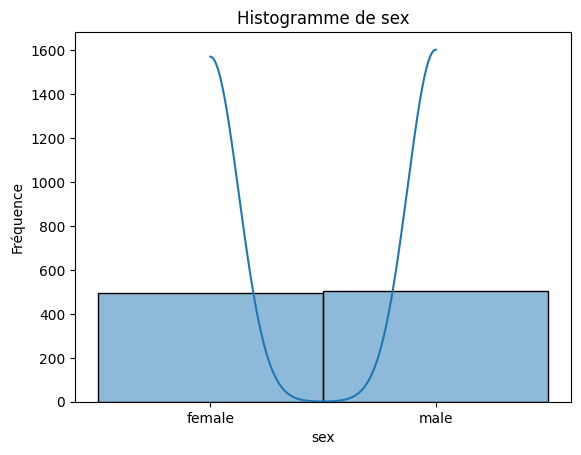

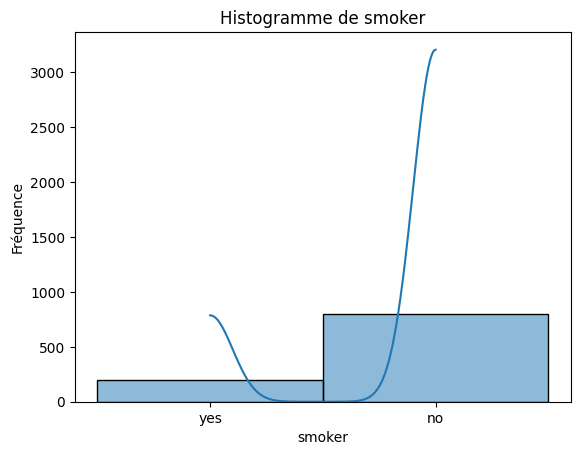

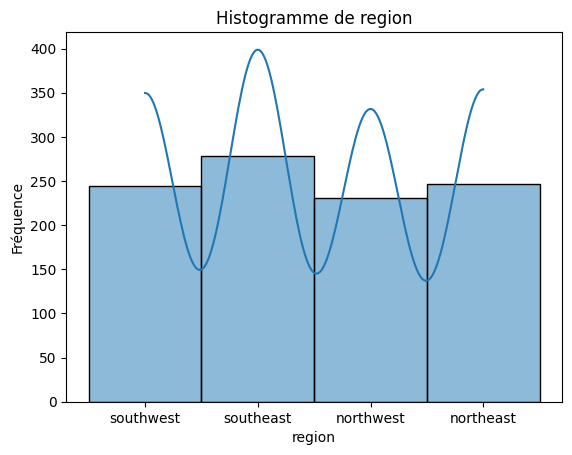

In [15]:
#Histogramme

for colonne in QualitativeData:
    mplt.figure()
    sb.histplot(data[colonne], kde=True)
    mplt.title(f"Histogramme de {colonne}")
    mplt.xlabel(colonne)
    mplt.ylabel("Fréquence")
    mplt.show()

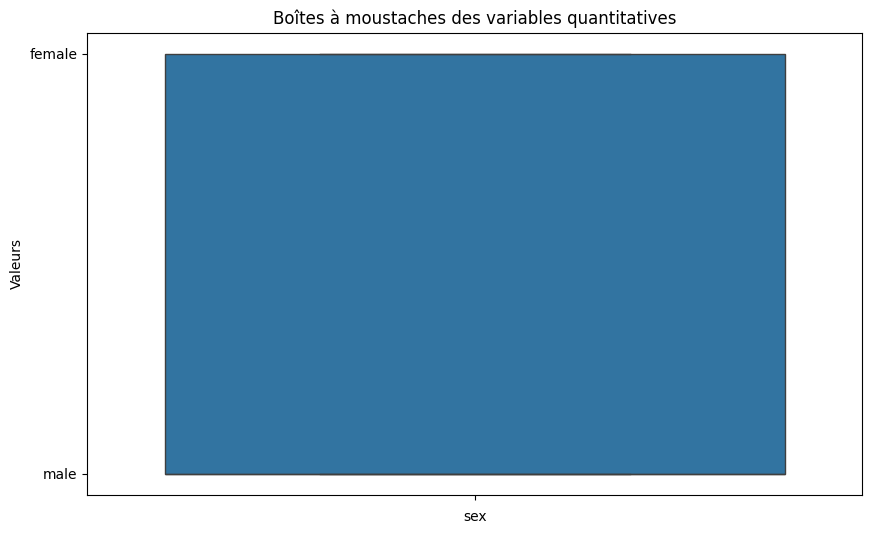

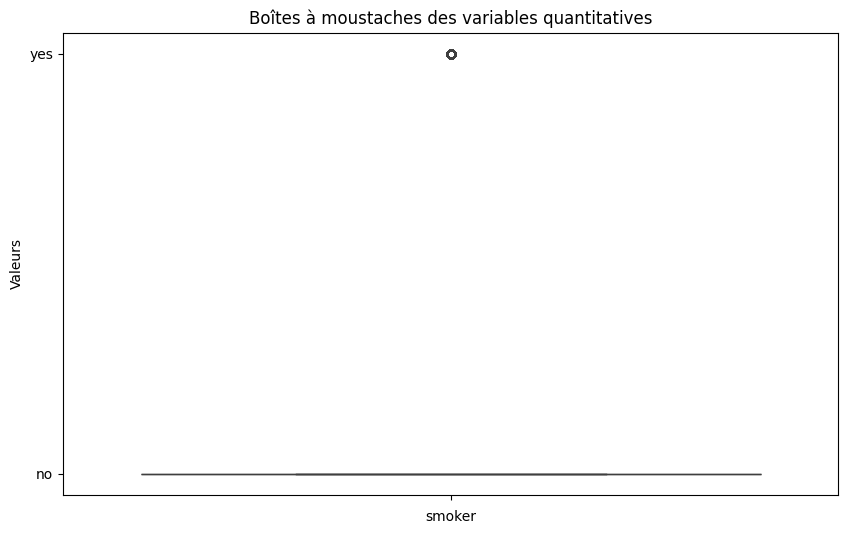

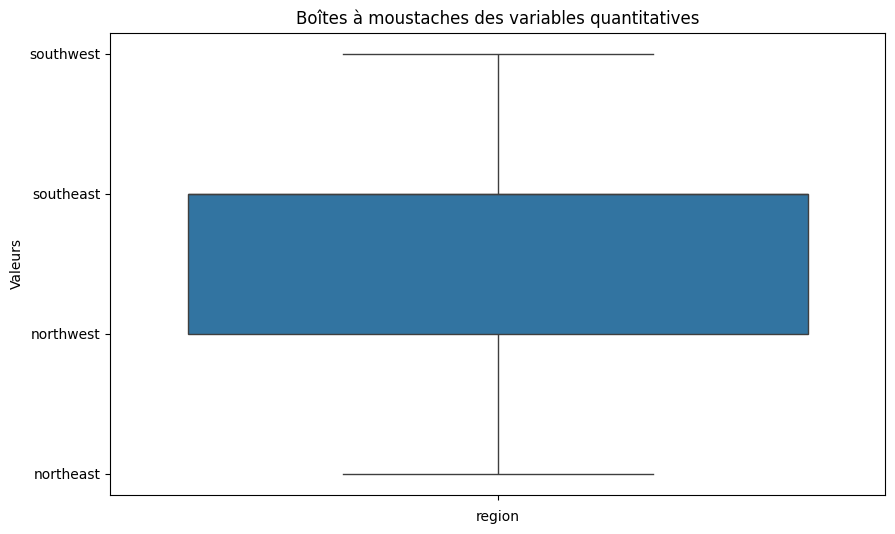

In [16]:
# boîtes à moustaches
for colonne in QualitativeData:
    mplt.figure(figsize=(10, 6))
    sb.boxplot(data[colonne])
    mplt.title("Boîtes à moustaches des variables quantitatives")
    mplt.xlabel(colonne)
    mplt.ylabel("Valeurs")
    mplt.show()

# Analyse descriptive bivariée entre la variable cible et les variables qualitatives a l'aide d'une boîtes à moustache

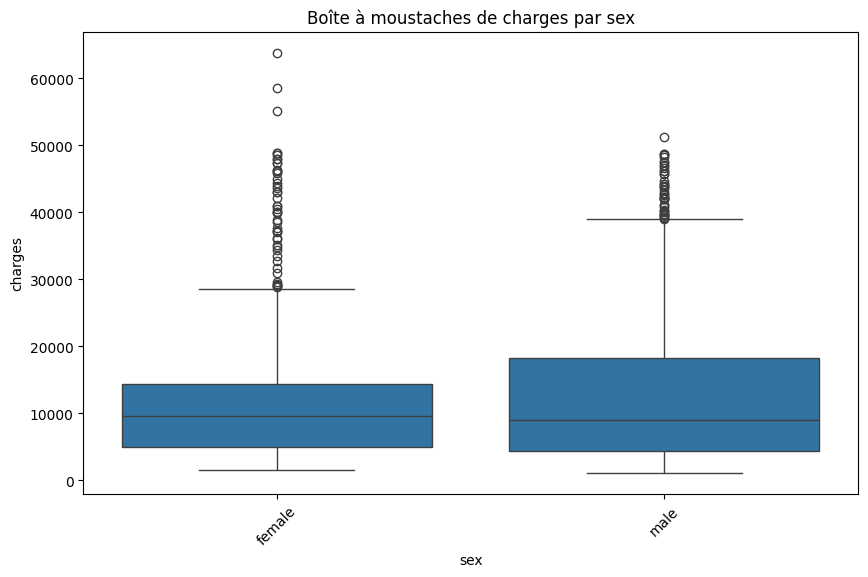

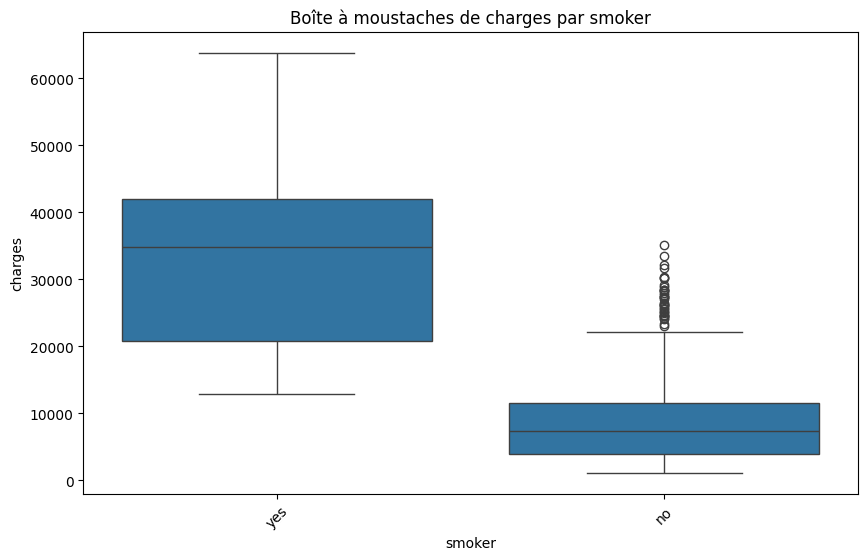

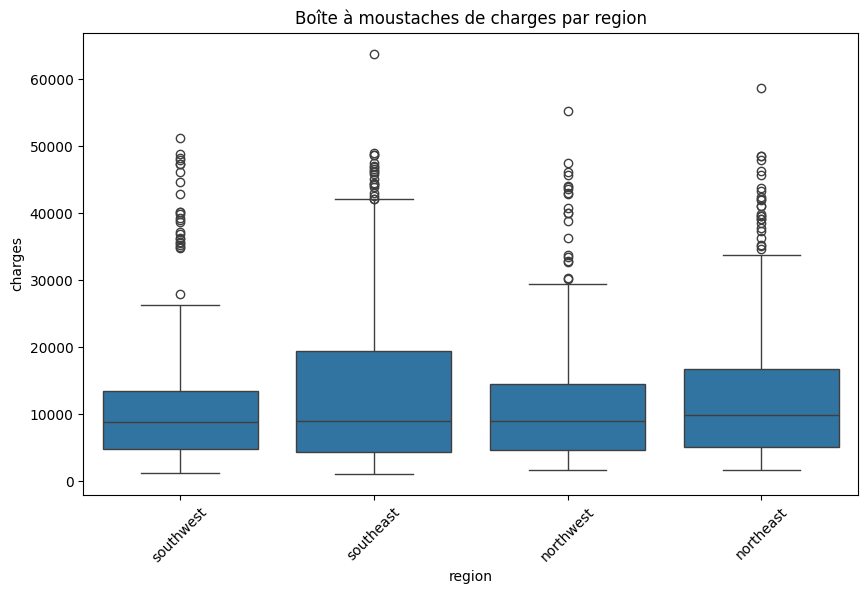

In [13]:
# Créer des boîtes à moustaches pour l'analyse bivariée
for column in QualitativeData:
    mplt.figure(figsize=(10, 6))
    sb.boxplot(x=column, y='charges', data=data)
    mplt.title(f"Boîte à moustaches de charges par {column}")
    mplt.xlabel(column)
    mplt.ylabel('charges')
    mplt.xticks(rotation=45)
    mplt.show()


# Analyse descriptive bivariée entre la variable cible et les variables quantitatives a l'aide de nuage de point

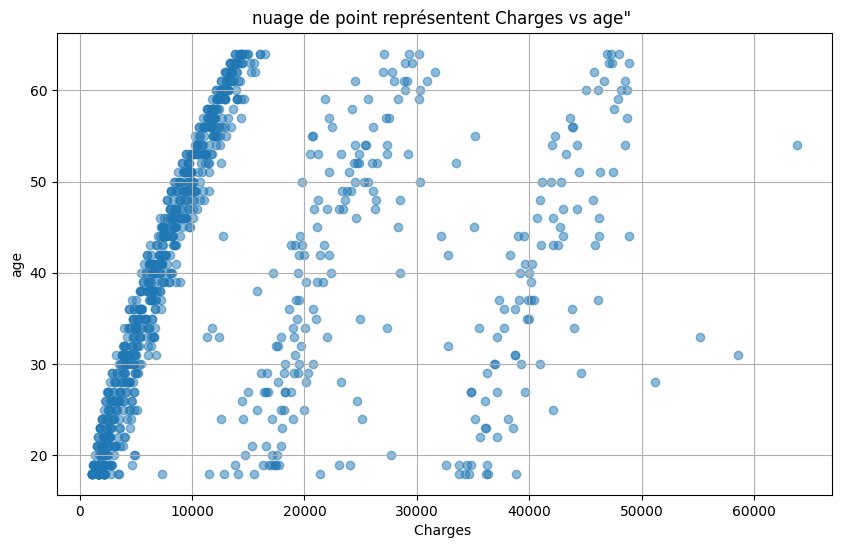

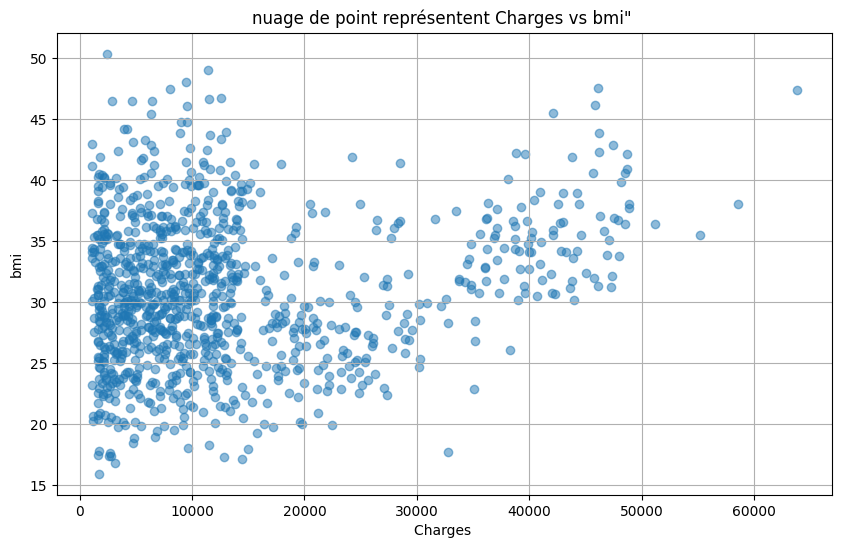

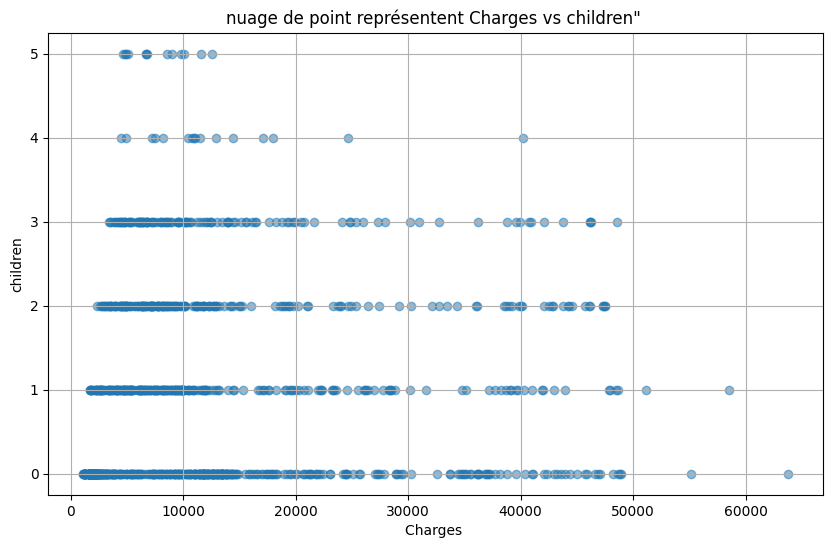

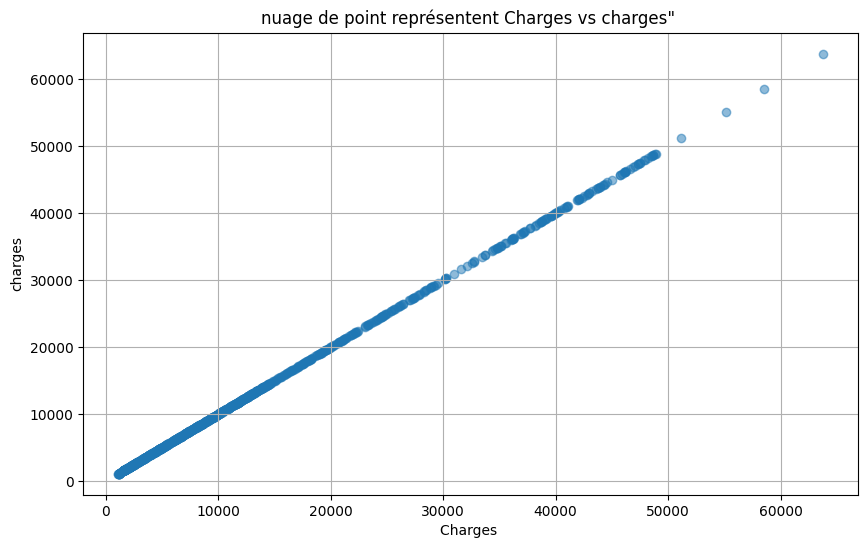

In [18]:
for colonne in QuantitativeData:
    mplt.figure(figsize=(10, 6))
    mplt.scatter(data['charges'], data[colonne], alpha=0.5)
    mplt.title(f'nuage de point représentent Charges vs {colonne}" ')
    mplt.xlabel('Charges ')
    mplt.ylabel(colonne)
    mplt.grid(True)
    mplt.show()

# Concevoir une matrice de corrélation entre les variables quantitatives de la base de données.

In [15]:
matix_corr = data[QuantitativeData].corr()
matix_corr

,age,bmi,children,charges
age,1.000000,0.115547,0.029630,0.331909
bmi,0.115547,1.000000,0.025439,0.187547
children,0.029630,0.025439,1.000000,0.050799
charges,0.331909,0.187547,0.050799,1.000000


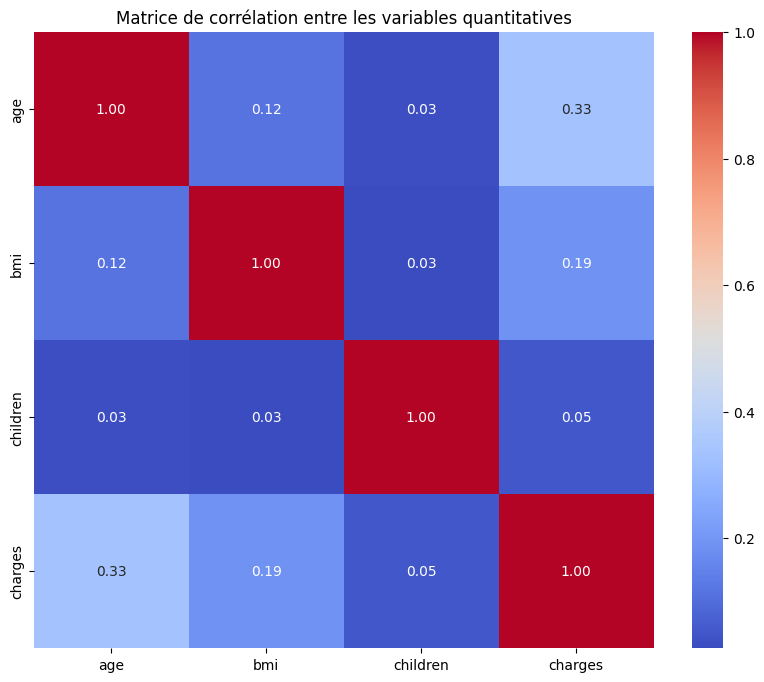

In [16]:
# Visualiser la matrice de corrélation
mplt.figure(figsize=(10, 8))
sb.heatmap(matix_corr, annot=True, cmap='coolwarm', fmt='.2f')
mplt.title("Matrice de corrélation entre les variables quantitatives")
mplt.show()

# Interprétation l’ensemble des résultats issus de l’analyse descriptive. ??

# c. Faire le pré-traitement des données


# Convertir les variables qualitatives au format approprié pour la modélisation

In [17]:
# Conversion des variables qualitatives en variables numériques
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = data['region'].map({'southeast': 0, 'northeast': 1, 'southwest': 2, 'northwest': 3})

data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
995,39,0,23.275,3,0,1,7986.47525
996,39,0,34.100,3,0,2,7418.52200
997,63,0,36.850,0,0,0,13887.96850
998,33,0,36.290,3,0,1,6551.75010


# Séparer la variable cible des variables explicatives

In [18]:
# Séparer la variable cible (charges) des variables explicatives

X = data.drop(columns=['charges'])
y = data['charges']


# Diviser  la  base  de  données  en  échantillon  d’apprentissage  (80%)  et  en échantillon test (20%)

In [19]:
#  Séparer la variable cible (charges) des variables explicatives
X = data.drop(columns=['charges'])
y = data['charges']

In [20]:
# Diviser les données en échantillon d'apprentissage (80%) et en échantillon test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille de X_train: {X_train.shape}")
print(f"Taille de X_test: {X_test.shape}")
print(f"Taille de y_train: {y_train.shape}")
print(f"Taille de y_test: {y_test.shape}")


Taille de X_train: (800, 6)
Taille de X_test: (200, 6)
Taille de y_train: (800,)
Taille de y_test: (200,)


In [ ]:
# Étape 4 : Normaliser les données (standardisation)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrainement du model Knn

In [21]:
# Fonction pour entraîner et évaluer un modèle KNN
def train_evaluate_knn(k=5):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error pour k={k}: {mse}")
    r2 = r2_score(y_test, y_pred)
    print(f"Coefficient de détermination (R^2) du modèle optimisé : {r2}")

    return mse , knn


In [22]:

# Modèle M1 avec k=3
M1 = train_evaluate_knn(3)

# Modèle M2 avec k=7
M2 = train_evaluate_knn(7)

# Modèle M3 avec k=10
M3 = train_evaluate_knn(10)

Mean Squared Error pour k=3: 187677638.37629357
Coefficient de détermination (R^2) du modèle optimisé : 0.039030782665869235
Mean Squared Error pour k=7: 171187242.56717685
Coefficient de détermination (R^2) du modèle optimisé : 0.12346685555828374
Mean Squared Error pour k=10: 162833820.00324482
Coefficient de détermination (R^2) du modèle optimisé : 0.16623903669170204


On observe une tendance où l'augmentation de la valeur de k entraîne une diminution du MSE, ce qui suggère que les modèles avec des valeurs de k plus élevées peuvent offrir de meilleures performances dans ce contexte.

# Facultatif : Sauvegarder les échantillons dans des fichiers CSV

In [ ]:
# # Facultatif : Sauvegarder les échantillons dans des fichiers CSV
# X_train_data = pd.DataFrame(X_train, columns=data.drop(columns=['charges']).columns)
# X_test_data = pd.DataFrame(X_test, columns=data.drop(columns=['charges']).columns)

# X_train_data.to_csv('./data/X_train.csv', index=False)
# X_test_data.to_csv('./data/X_test.csv', index=False)
# y_train.to_csv('./data/y_train.csv', index=False)
# y_test.to_csv('./data/y_test.csv', index=False)

# Optimisation pour K=10

In [20]:
# Définir le modèle KNN de base avec k=10
knn_k10 = KNeighborsRegressor(n_neighbors=10)


In [24]:
# Définir la grille des hyperparamètres à tester
param_grid = {
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # p=1 pour la distance de Manhattan, p=2 pour la distance Euclidienne
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=knn_k10, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entraîner GridSearchCV
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=10), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [23]:

# Afficher les meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")

# Entraîner le modèle avec les meilleurs paramètres
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Évaluer les performances du modèle optimisé
mse_optimized = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error du modèle optimisé : {mse_optimized}")
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination (R^2) du modèle optimisé : {r2}")

# Afficher les résultats de GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
#results.to_csv('./data/grid_search_results.csv', index=False)

Meilleurs hyperparamètres : {'algorithm': 'auto', 'p': 1, 'weights': 'distance'}
Mean Squared Error du modèle optimisé : 140315072.39119214
Coefficient de détermination (R^2) du modèle optimisé : 0.2815421887097984


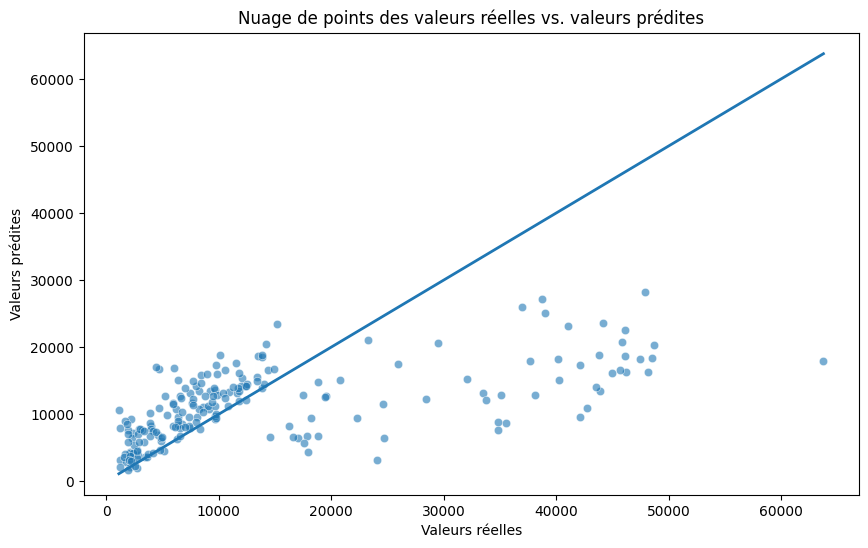

In [ ]:
# Créer le nuage de points
mplt.figure(figsize=(10, 6))
sb.scatterplot(x=y_test, y=y_pred, alpha=0.6)
mplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-', linewidth=2)
mplt.xlabel('Valeurs réelles')
mplt.ylabel('Valeurs prédites')
mplt.title('Nuage de points des valeurs réelles vs. valeurs prédites')
mplt.show()